In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
media_column = []
err_column = []

with open('./gas/output_epot.dat', 'r') as file:
    for line in file:
        columns = line.split()
        
        if len(columns) >= 4:  # Ensures there are at least four columns
            second_value = columns[2].strip()
            fourth_value = columns[3].strip()

            if second_value and fourth_value:  # Skips empty strings
                media_column.append(float(second_value))
                err_column.append(float(fourth_value))

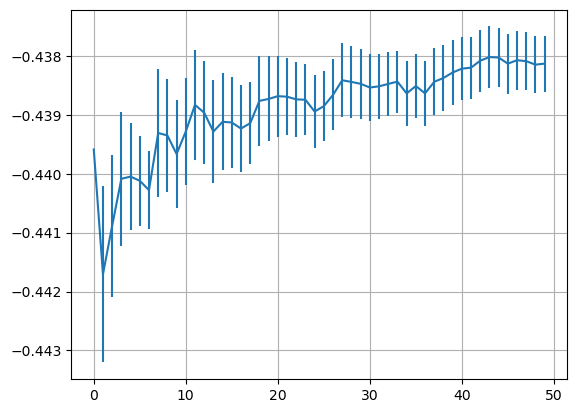

In [9]:
plt.errorbar(np.arange(len(media_column)), media_column , yerr=err_column)
plt.grid(True)
plt.show()

In [10]:
media_column = []
err_column = []

with open('./gas/output_pres.dat', 'r') as file:
    for line in file:
        columns = line.split()
        
        if len(columns) >= 4:  # Ensures there are at least four columns
            second_value = columns[2].strip()
            fourth_value = columns[3].strip()

            if second_value and fourth_value:  # Skips empty strings
                media_column.append(float(second_value))
                err_column.append(float(fourth_value))

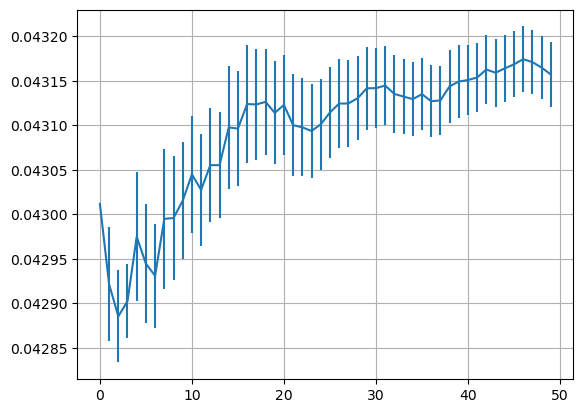

In [11]:
plt.errorbar(np.arange(len(media_column)), media_column , yerr=err_column)
plt.grid(True)
plt.show()

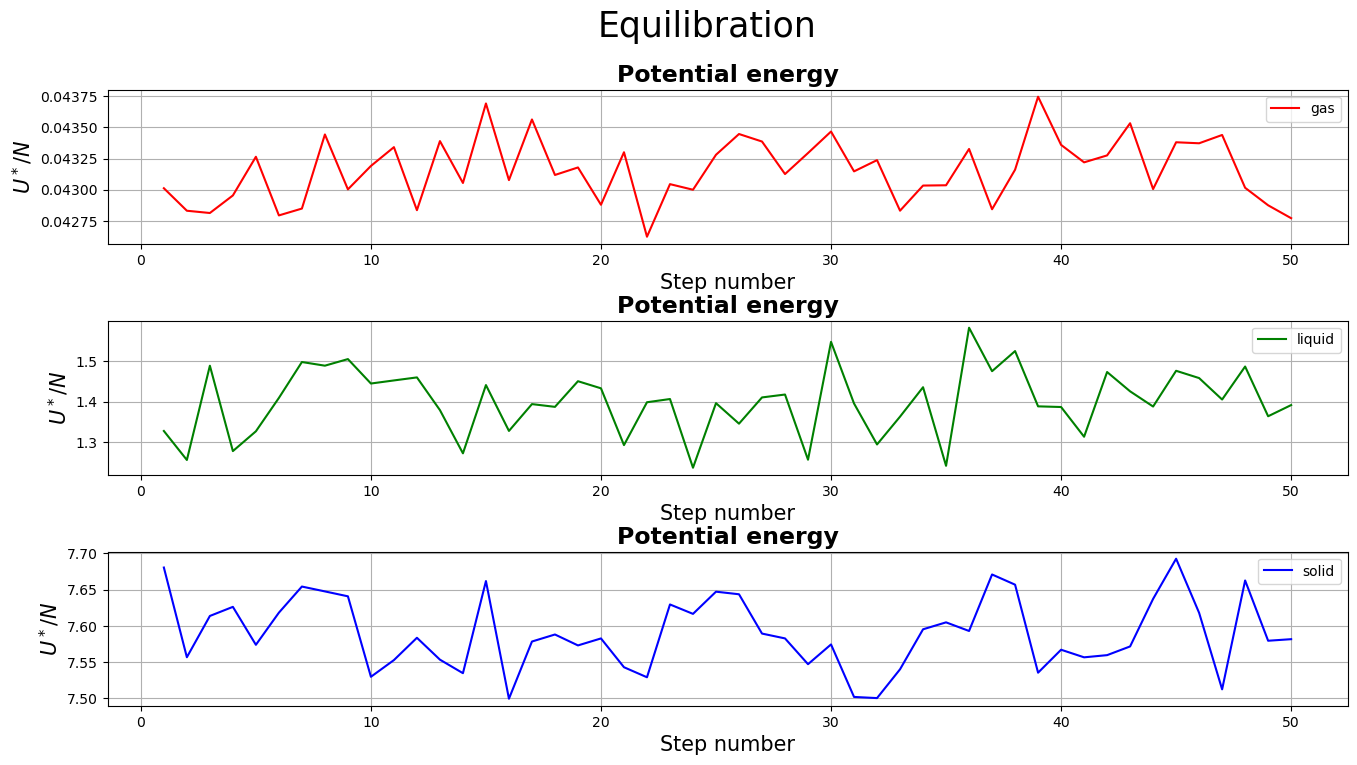

In [12]:
import matplotlib.pyplot as plt
import numpy as np

N = 50
x = np.arange(1, N+1)    # use the ordering from 1 to N

phase = ["gas", "liquid", "solid"]
colors = ["r", "g", "b"]

plt.figure(figsize=(16, 8))
plt.suptitle("Equilibration", fontsize=25)

for i, phase_folder in enumerate(phase):
    file_path = "./" + phase_folder + "/output_pres.dat"
    
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            columns = line.split()
            if len(columns) >= 2:
                value = columns[1].strip()
                if value:
                    data.append(float(value))
    
    plt.subplot(3, 1, i+1)
    plt.plot(x[:len(data)], data, marker='', label=phase[i], color=colors[i])
    plt.title('Potential energy', fontsize=17, fontweight="bold")
    plt.ylabel('$U^*/N$', fontsize=15)
    plt.xlabel('Step number', fontsize=15)
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(hspace=0.5)

plt.show()


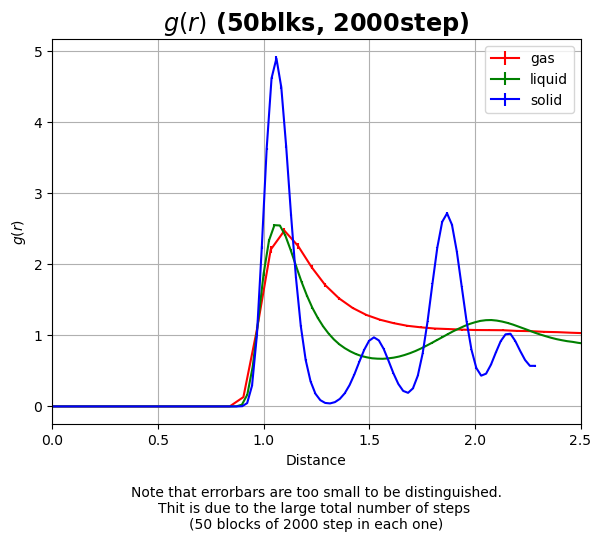

In [17]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

cap1 = ("\n\nNote that errorbars are too small to be distinguished.\n"
      "Thit is due to the large total number of steps \n"
      "(50 blocks of 2000 step in each one)")
cap2 = ("\n\nHere errorbars are can be distinguished.\n"
      "I used 50 blks and 50 step in each.")
colors = ["r","g","b"]

phase = ["gas", "liquid", "solid"]

ng = 100
x=np.arange(0,ng)

# box scaling
rho = [0.05, 0.8, 1.1]
npart = 108
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = ((rho[i]/npart)**(-1/3))/200

fig=plt.figure(figsize=(15, 5))

for i in range(0,3):

    plt.subplot(1,2,1)
    gdr = np.loadtxt("./"+phase[i]+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
    y = np.mean(gdr, axis=1)
    err = np.std(gdr, axis=1)
    plt.errorbar(x*L[i], y, err, marker='', label=phase[i], color = colors[i])
    plt.title('$g(r)$ (50blks, 2000step)', size='xx-large', weight='bold')
    plt.ylabel('$g(r)$')
    plt.xlabel('Distance'+cap1)
    plt.grid(True)
    plt.legend()
    plt.xlim(0,2.5)

 

plt.show()